In [1]:
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("Solarize_Light2")

In [2]:
data = pd.read_csv("ZF_Elec_Responses.csv")
data.head()

,Timestamp,Full Name (3 names at least),Phone Number,Email,Faculty - Department,Academic Year,Date of birth,Facebook URL,LinkedIn URL (optional),What do you know about Z Fast Racing Team?,How did you hear about us?,Do you have any volunteering experience?,"If yes, what is your volunteering experience?",What do you know about electrical vehicle ?,What do you know about competition we participate ?,What do you seek to learn by joining Z Fast Team?,Any questions?
0,5/12/2022 19:30:19,Mohamed Monir Mohamed,01210933802,mohameddobea13@gmail.com,Electrical engineering,3rd year,11/11/2000,https://www.facebook.com/Mohamed.Monir0,https://www.linkedin.com/in/mohamed-dobea-a911...,Z-Fast is the team that represents to Zagazig ...,Facebook,Yes,I have volunteered with AIESEC SOLVAKIAN organ...,It is an automotive vehicle that uses one or m...,EVER is giving young engineer the opportunity ...,I would like to improve my skills in embedded ...,NaN
1,5/12/2022 20:01:06,Mohammed Salah Aboshosha,01027463950,mohamedaboshosha12@gmail.com,Engineering - Electrical,2nd year,10/27/2001,https://www.facebook.com/Mohammedsalah.hasona,https://www.linkedin.com/in/mohammed-salah-hasona,Z Fast is a racing team which represents Zagaz...,"Facebook, Friends",Yes,Joined zag eng family for about one and half y...,To sum up electrical vehicles are vehicles tha...,EVER competition as Z Fast got the best Innova...,Learning more about embedded systems and elect...,No thanks
2,5/12/2022 20:15:51,mohamed salah fathy abdelhamid,01004257855,medosalahmedo4@gmail.com,engengineering-mechatronics,3rd year,11/17/2000,https://www.facebook.com/medo.salah210/,NaN,its a team represents Zagazig University in El...,"Facebook, Friends",No,this will be first time,An electric vehicle (EV) is one that uses an e...,i know that you make an electrical vehicle tha...,I am seeking to develop my skills in embedded ...,thanks
3,5/12/2022 20:17:26,Omar Saad Mohamed Saad Soliman,01149493914,mingosos13@gmail.com,Mechatronics,3rd year,1/27/2001,https://www.facebook.com/omar.saad.3726,https://www.linkedin.com/in/omar-soliman-a4198...,A team that makes an electric car and enter co...,"Facebook, Friends, Faculty colleagues",No,no thing,They are new vehicle that run on electric batt...,no thing,New skills in communication and working by my ...,no
4,5/12/2022 20:30:14,ماجد علاء السيد محمد,01013414668,Magedalaazsc@gmail.com,كلية الهندسة - أولى كهربا,2nd year,2/24/2002,https://www.facebook.com/maged.alaa.315,NaN,تيم طموح بيعمل حاجة عندي الشغف اتعلمها واطلع ط...,"Facebook, Friends",Yes,Zag Eng team ( for 6 months - now)\nResala cha...,صديقة للبيئة وموفرة وهي حاجة جديد ففيها مجال ل...,اسمها EVER تقريبا وخاصة بتصميم وتشغيل سيارات ا...,اتعلم اردوينو مهم بالنسبالي جدا وكمان جزء ال E...,Thanks


# First step, asking questions!

From the data above we can notice some important columns that using them, we can get some information, visualise, and come up with useful insights.

The questions that should be answered at the end of this data analysis:

1. What is the relation between the distance between the deadline and the number of applications?
2. What is the relation between the number of applications and the birth year?
3. What is the relation between the number of applications and the academic year?
4. Visualization of email providers and mobile numbers count! For example how many use Gmail and how many use Outlook?
5. Relation between the number of applications, birth year, academic year, and whether the applicant has volunteering experience before or not!

# Second step, wrangling data

In [3]:
print(f"{data.shape = }")

data.shape = (90, 17)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Timestamp                                            90 non-null     object
 1   Full Name (3 names at least)                         90 non-null     object
 2   Phone Number                                         90 non-null     object
 3   Email                                                90 non-null     object
 4   Faculty - Department                                 90 non-null     object
 5   Academic Year                                        90 non-null     object
 6   Date of birth                                        90 non-null     object
 7   Facebook URL                                         90 non-null     object
 8   LinkedIn URL (optional)                              58 non-null     object
 9   W

In [5]:
columns_to_drop = [
    'Facebook URL',
    'What do you know about Z Fast Racing Team?',
    'How did you hear about us?',
    'If yes, what is your volunteering experience?',
    'What do you know about electrical vehicle ?',
    'What do you know about competition we participate ?',
    'What do you seek to learn by joining Z Fast Team?',
    'Any questions?',
    'Faculty - Department'
]

data = data.drop(columns=columns_to_drop, errors="ignore")
data.head(2)

,Timestamp,Full Name (3 names at least),Phone Number,Email,Academic Year,Date of birth,LinkedIn URL (optional),Do you have any volunteering experience?
0,5/12/2022 19:30:19,Mohamed Monir Mohamed,01210933802,mohameddobea13@gmail.com,3rd year,11/11/2000,https://www.linkedin.com/in/mohamed-dobea-a911...,Yes
1,5/12/2022 20:01:06,Mohammed Salah Aboshosha,01027463950,mohamedaboshosha12@gmail.com,2nd year,10/27/2001,https://www.linkedin.com/in/mohammed-salah-hasona,Yes


In [6]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format='mixed')
data["Date of birth"] = pd.to_datetime(data["Date of birth"], format='mixed')
data["Date of birth"]

0    2000-11-11
1    2001-10-27
2    2000-11-17
3    2001-01-27
4    2002-02-24
        ...    
85   2001-04-01
86   2000-10-19
87   2003-11-20
88   2002-09-27
89   2001-05-20
Name: Date of birth, Length: 90, dtype: datetime64[ns]

In [7]:
def fix_phone_number(phone):
    phone = phone.replace(" ", "")
    if len(phone) == 10:
        phone = "0" + phone
    if len(phone) < 2: return None
    if phone[:2] == "+2":
        phone = phone[2:]
    if len(phone) < 3: return None
    return phone[:3]

phone_number = data["Phone Number"].map(fix_phone_number)
data["Phone Number"] = phone_number
phone_number[phone_number.str.len() != 11]

0     012
1     010
2     010
3     011
4     010
     ... 
85    012
86    012
87    011
88    010
89    010
Name: Phone Number, Length: 90, dtype: object

In [8]:
import re
regex = r'^.*?@(.+)\.[a-zA-Z-_]+$'

def fix_email(email):
    if type(email) != str: return None 
    match = re.match(regex, email.strip())
    if not match: return None
    return match.group(1)

email = data["Email"].map(fix_email)
data["Email"] = email
data.head()

,Timestamp,Full Name (3 names at least),Phone Number,Email,Academic Year,Date of birth,LinkedIn URL (optional),Do you have any volunteering experience?
0,2022-05-12 19:30:19,Mohamed Monir Mohamed,012,gmail,3rd year,2000-11-11,https://www.linkedin.com/in/mohamed-dobea-a911...,Yes
1,2022-05-12 20:01:06,Mohammed Salah Aboshosha,010,gmail,2nd year,2001-10-27,https://www.linkedin.com/in/mohammed-salah-hasona,Yes
2,2022-05-12 20:15:51,mohamed salah fathy abdelhamid,010,gmail,3rd year,2000-11-17,NaN,No
3,2022-05-12 20:17:26,Omar Saad Mohamed Saad Soliman,011,gmail,3rd year,2001-01-27,https://www.linkedin.com/in/omar-soliman-a4198...,No
4,2022-05-12 20:30:14,ماجد علاء السيد محمد,010,gmail,2nd year,2002-02-24,NaN,Yes


# Third and forth steps, explorations and conclusions

### What is the relation between the distance between the deadline and the number of applications?

We notice that the **rush of applications happens at the beggining** of the recruitment not as I was expecting that it happes at the end.

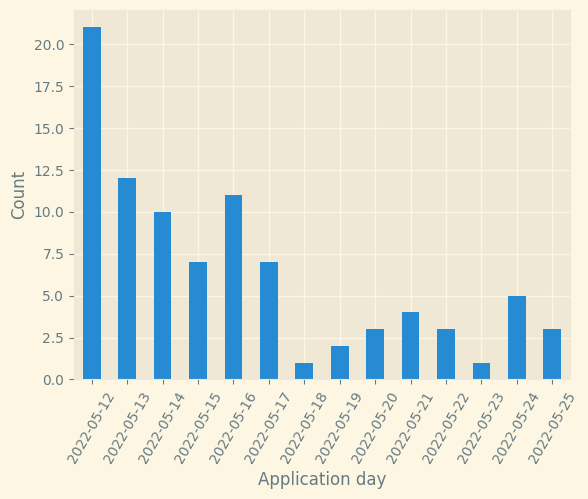

In [9]:
ts = data['Timestamp'].dt.date.value_counts().sort_index()
ax = ts.plot(kind='bar', rot=60)
ax.set_xlabel("Application day")
ax.set_ylabel("Count")
plt.show()

### What is the relation between the number of applications and the birth year?

It is shocking for me to see applicant who was born in 1991! Isn't that shocking for you as well? Is this a mistake by the applicant and this information is invalid!

You the statistical power of Pandas library we can get the mean birth date which is **2001-10-27** after removing out-liers in ISO format which make sense. Most applicants were in there first or second academic year.

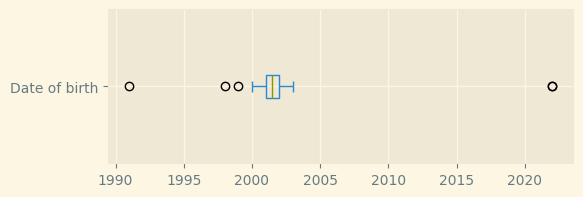

In [10]:
fig, ax = plt.subplots(figsize=(6, 2))
data['Date of birth'].dt.year.plot(kind="box", vert=False, ax=ax)
plt.show()

data['Date of birth']
plt.show()

In [11]:
from datetime import datetime
birth = data['Date of birth']
year_2000 = datetime(2000, 1, 1)
year_2004 = datetime(2004, 1, 1)
birth[(birth < year_2000) | (birth > year_2004)]

26   1991-04-04
44   1998-04-02
61   2022-05-14
64   2022-05-17
77   1999-12-15
Name: Date of birth, dtype: datetime64[ns]

In [12]:
# Remove out-liers
data.loc[birth > year_2004, 'Date of birth'] = pd.NaT
data['Date of birth'].describe()

count                               88
mean     2001-10-27 06:32:43.636363648
min                1991-04-04 00:00:00
25%                2001-04-01 00:00:00
50%                2001-12-12 12:00:00
75%                2002-08-04 00:00:00
max                2003-11-20 00:00:00
Name: Date of birth, dtype: object

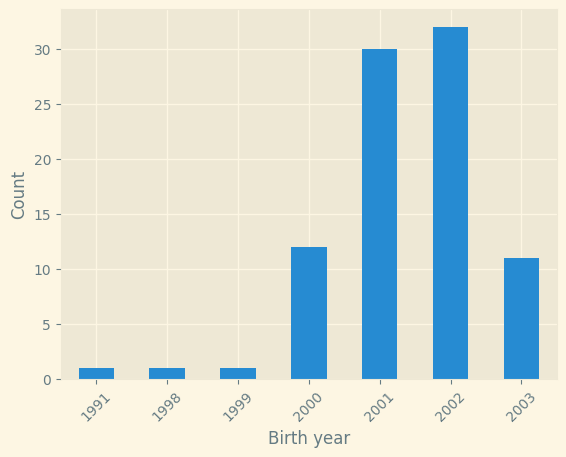

In [28]:
ts = data['Date of birth'].dt.year.dropna().astype(int).value_counts().sort_index()
ax = ts.plot(kind='bar', rot=45)
ax.set_xlabel("Birth year")
ax.set_ylabel("Count")
plt.show()

### What is the relation between the number of applications and the academic year?

The bar plot below makes perfect sense!

<Axes: xlabel='Academic Year'>

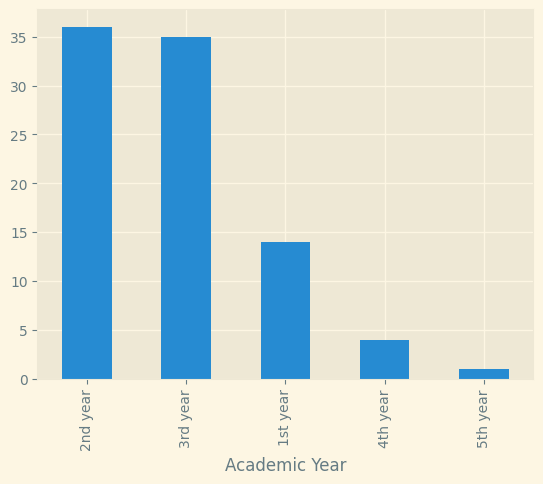

In [14]:
acyear = data["Academic Year"]
acyear.value_counts().plot(kind="bar")

### Visualization of email providers and mobile numbers count! For example how many use Gmail and how many use Outlook?

Ok we notice that someone used his educational email which may not be a good idea if people want to access him after graduation, so you should better use your Gmail like all other applicants. It seems like a monopoly by Google 😂!

Phone numbers providers seems like ok. Most of the applicants are using Vodafone and the few of them are using We which is the newest one with small market share.

In [15]:
data['Email'].value_counts()

Email
gmail          88
beng.bu.edu     1
gmil            1
Name: count, dtype: int64

In [16]:
data['Phone Number'].value_counts()

Phone Number
010    43
012    23
011    20
015     4
Name: count, dtype: int64

<Axes: xlabel='Phone Number'>

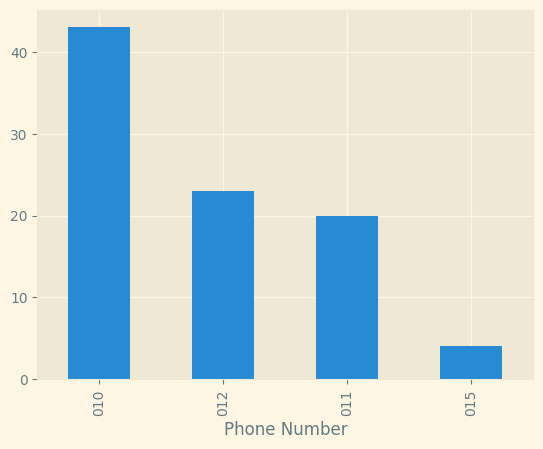

In [17]:
data['Phone Number'].value_counts().plot(kind='bar')

### Relation between the number of applications, birth year, academic year, and whether the applicant has volunteering experience before or not!

Sometimes it can be difficult to interpret bubble plots, but in this case, we can observe that there is **no correlation between the birth year and the academic year**. Similarly, we can see that there is **no correlation between the volunteering status and either the academic or birth year**. This may depend on the individual's circumstances and life experiences.

<Axes: xlabel='Do you have any volunteering experience?', ylabel='Count'>

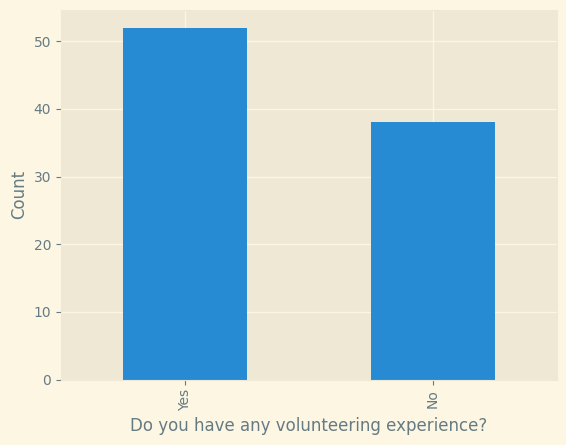

In [18]:
volun = data["Do you have any volunteering experience?"]
acyear = data["Academic Year"]
volun.value_counts().plot(kind="bar", ylabel="Count")

In [25]:
subdata = data.loc[:,("Date of birth", "Academic Year", "Do you have any volunteering experience?")]
subdata['Date of birth'] = subdata['Date of birth'].dt.year
subdata.dropna(subset=['Date of birth', 'Academic Year'], inplace=True)
subdata['Date of birth'] = subdata['Date of birth'].astype(int)
subdata.head(3)

,Date of birth,Academic Year,Do you have any volunteering experience?
0,2000,3rd year,Yes
1,2001,2nd year,Yes
2,2000,3rd year,No


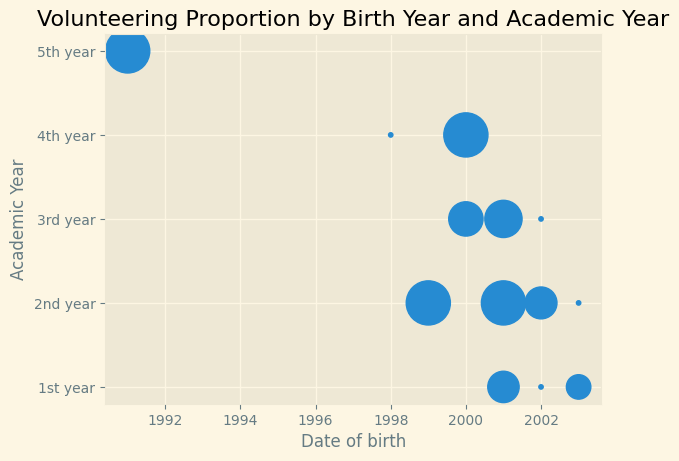

In [32]:
# Calculate the proportion of students who have volunteering experience
# for each birth year and academic year combination

volunteer_prop = subdata.groupby(['Date of birth', 'Academic Year']) \
        ['Do you have any volunteering experience?'] \
        .apply(lambda x: (x == 'Yes').sum() / len(x))

years = subdata['Date of birth'].unique()
ac = subdata['Academic Year'].unique()
ac.sort()

yy, xx = np.meshgrid(ac, years)

xx_flat = xx.flatten()
yy_flat = yy.flatten()
vol_prop_flat = []
for i in range(len(xx_flat)):
    x, y = xx_flat[i], yy_flat[i]
    if x in volunteer_prop and y in volunteer_prop[x]:
        # +0.01 to make it appear as small dot as indication that application with
        # this birth year and academic year combination haven't volunteered before
        vol_prop_flat.append(volunteer_prop[x][y] + 0.01)
    else:
        vol_prop_flat.append(0.)

fig, ax = plt.subplots()
ax.scatter(xx_flat, yy_flat, s=np.array(vol_prop_flat) * 1000)
ax.set_xlabel('Date of birth')
ax.set_ylabel('Academic Year')
ax.set_title('Volunteering Proportion by Birth Year and Academic Year')
plt.show()